In [91]:
import platform
import sys
import pip
from pip._internal.operations.freeze import freeze

# OS 및 Python 버전 출력
print(f"Operating System: {platform.system()} {platform.release()} ({platform.version()})")
print(f"Processor: {platform.processor()}")
print(f"Python Version: {sys.version}")

# 설치된 라이브러리 출력 (pip freeze 방식)
print("\nInstalled Libraries:")
for package in freeze():
    print(package)


Operating System: Windows 10 (10.0.22631)
Processor: Intel64 Family 6 Model 154 Stepping 3, GenuineIntel
Python Version: 3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]

Installed Libraries:
absl-py==2.1.0
ace_tools==0.0
aiosignal==1.3.1
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
alembic==1.13.3
anaconda-anon-usage @ file:///C:/b/abs_95v3x0wy8p/croot/anaconda-anon-usage_1697038984188/work
anaconda-client==1.11.2
anaconda-cloud-auth @ file:///C:/b/abs_410afndtyf/croot/anaconda-cloud-auth_1697462767853/work
anaconda-navigator @ file:///C:/b/abs_fetmwtxkqo/croot/anaconda-navigator_1709540481120/work
anaconda-project @ file:///C:/Windows/TEMP/abs_91fu4tfkih/croots/recipe/anaconda-project_1660339890874/work
anyio @ file:///C:/ci/anyio_1644481856696/work/dist
anytree==2.12.1
appdirs==1.4.4
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci/argon2-cffi-bindings_1

# Library import

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import warnings
warnings.filterwarnings("ignore")
import time
import statsmodels.api as sm
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib.gridspec as gridspec
import math

# 한글 폰트 설정 (예: 맑은 고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 환경
# plt.rcParams['font.family'] = 'AppleGothic'  # Mac 환경
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지   

# Data Load

In [3]:
OriginalTrainData = pd.read_csv('train_1722.csv')

OriginalTrainData

,pid,year,month,day,weight,quantity,value
0,P001,2017,1,10,64893,100,786047
1,P001,2017,1,20,24506,2357,282998
2,P001,2017,1,30,7930,247,596801
3,P001,2017,2,10,5107,2206,766565
4,P001,2017,2,20,54188,1662,1791564
...,...,...,...,...,...,...,...
1075,P005,2022,11,20,88009,0,908462
1076,P005,2022,11,30,78000,0,786484
1077,P005,2022,12,10,75001,0,703534
1078,P005,2022,12,20,73001,0,708657


In [15]:
P001_DF = OriginalTrainData[OriginalTrainData['pid']=='P001']
P002_DF = OriginalTrainData[OriginalTrainData['pid']=='P002']
P003_DF = OriginalTrainData[OriginalTrainData['pid']=='P003']
P004_DF = OriginalTrainData[OriginalTrainData['pid']=='P004']
P005_DF = OriginalTrainData[OriginalTrainData['pid']=='P005']

# EDA

In [13]:
P001_value_mean = P001_DF['value'].mean()
P002_value_mean = P002_DF['value'].mean()
P003_value_mean = P003_DF['value'].mean()
P004_value_mean = P004_DF['value'].mean()
P005_value_mean = P005_DF['value'].mean()

print(P001_value_mean) # 92만
print(P002_value_mean) # 543만
print(P003_value_mean) # 346만
print(P004_value_mean) # 1.2억
print(P005_value_mean) # 80만

924078.3425925926
5438749.916666667
3460317.546296296
126098838.27777778
805648.2361111111


In [14]:
P001_value_median = P001_DF['value'].median()
P002_value_median = P002_DF['value'].median()
P003_value_median = P003_DF['value'].median()
P004_value_median = P004_DF['value'].median()
P005_value_median = P005_DF['value'].median()

print(P001_value_median) # 66만
print(P002_value_median) # 534만
print(P003_value_median) # 94만
print(P004_value_median) # 1.12억
print(P005_value_median) # 74만

665815.5
5349087.0
947038.5
112547584.0
744787.0


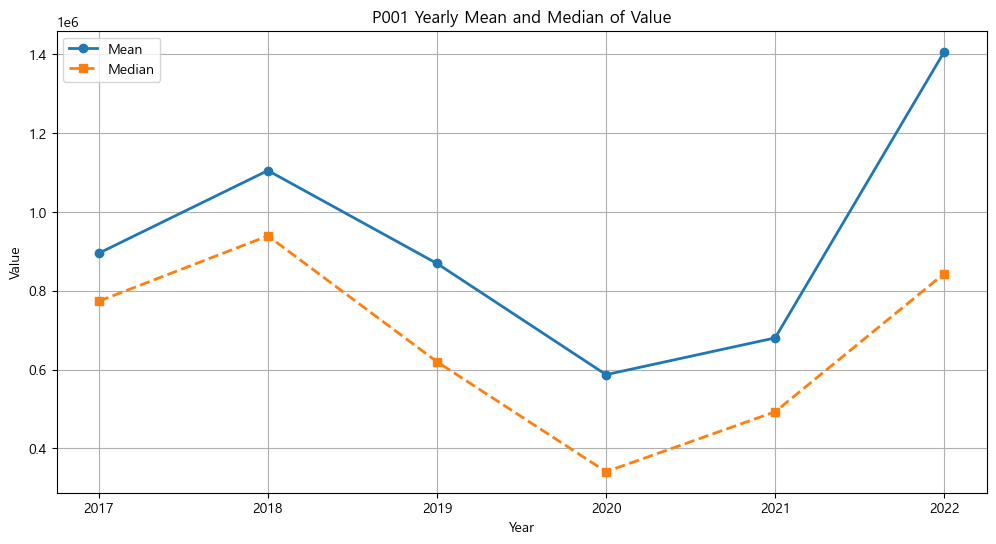

In [8]:
import matplotlib.pyplot as plt

# 연도별 mean과 median 계산
yearly_mean = P001_DF.groupby('year')['value'].mean()
yearly_median = P001_DF.groupby('year')['value'].median()

# 시각화
plt.figure(figsize=(12, 6))

# Mean plot
plt.plot(yearly_mean.index, yearly_mean.values, marker='o', label='Mean', linestyle='-', linewidth=2)

# Median plot
plt.plot(yearly_median.index, yearly_median.values, marker='s', label='Median', linestyle='--', linewidth=2)

# 그래프 제목 및 축 레이블 설정
plt.title('P001 Yearly Mean and Median of Value')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

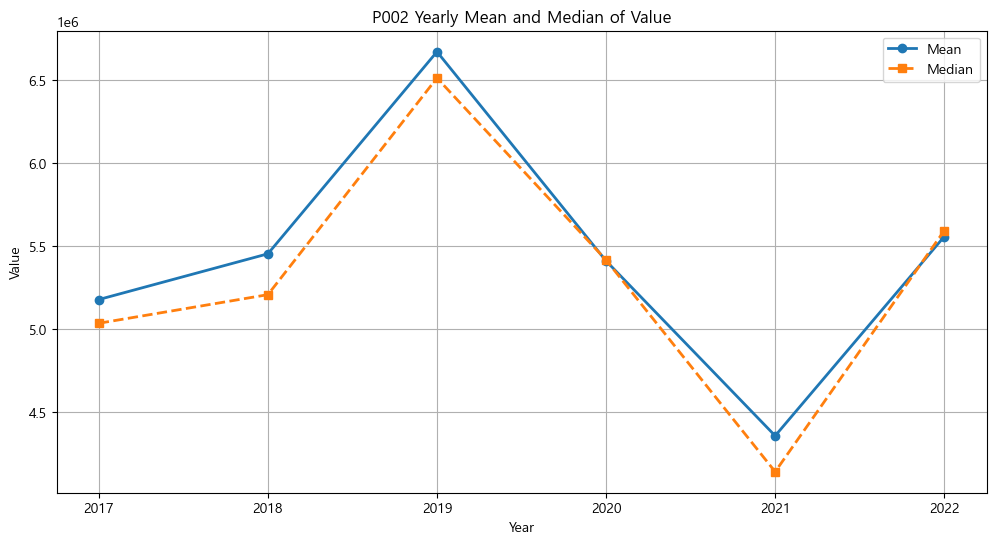

In [9]:
import matplotlib.pyplot as plt

# 연도별 mean과 median 계산
yearly_mean = P002_DF.groupby('year')['value'].mean()
yearly_median = P002_DF.groupby('year')['value'].median()

# 시각화
plt.figure(figsize=(12, 6))

# Mean plot
plt.plot(yearly_mean.index, yearly_mean.values, marker='o', label='Mean', linestyle='-', linewidth=2)

# Median plot
plt.plot(yearly_median.index, yearly_median.values, marker='s', label='Median', linestyle='--', linewidth=2)

# 그래프 제목 및 축 레이블 설정
plt.title('P002 Yearly Mean and Median of Value')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

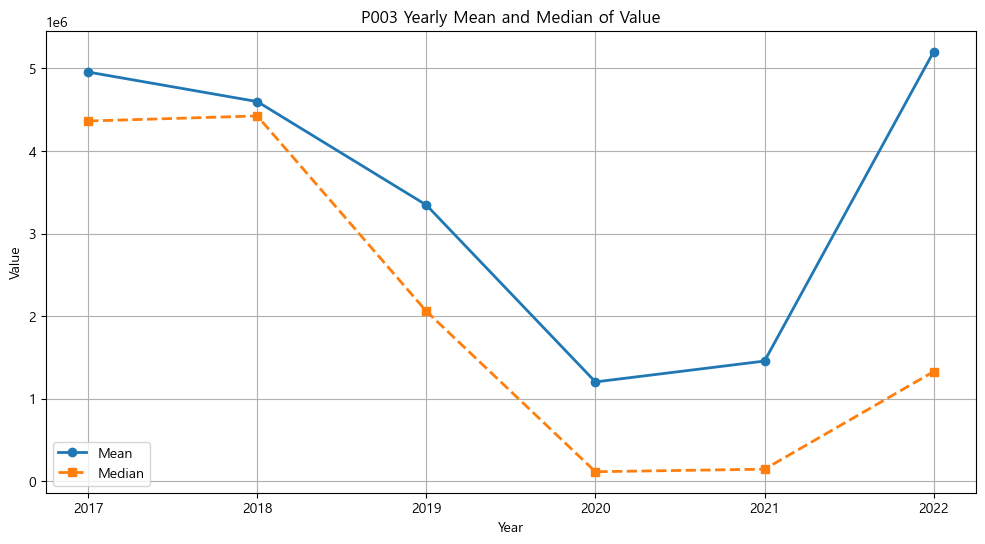

In [10]:
import matplotlib.pyplot as plt

# 연도별 mean과 median 계산
yearly_mean = P003_DF.groupby('year')['value'].mean()
yearly_median = P003_DF.groupby('year')['value'].median()

# 시각화
plt.figure(figsize=(12, 6))

# Mean plot
plt.plot(yearly_mean.index, yearly_mean.values, marker='o', label='Mean', linestyle='-', linewidth=2)

# Median plot
plt.plot(yearly_median.index, yearly_median.values, marker='s', label='Median', linestyle='--', linewidth=2)

# 그래프 제목 및 축 레이블 설정
plt.title('P003 Yearly Mean and Median of Value')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

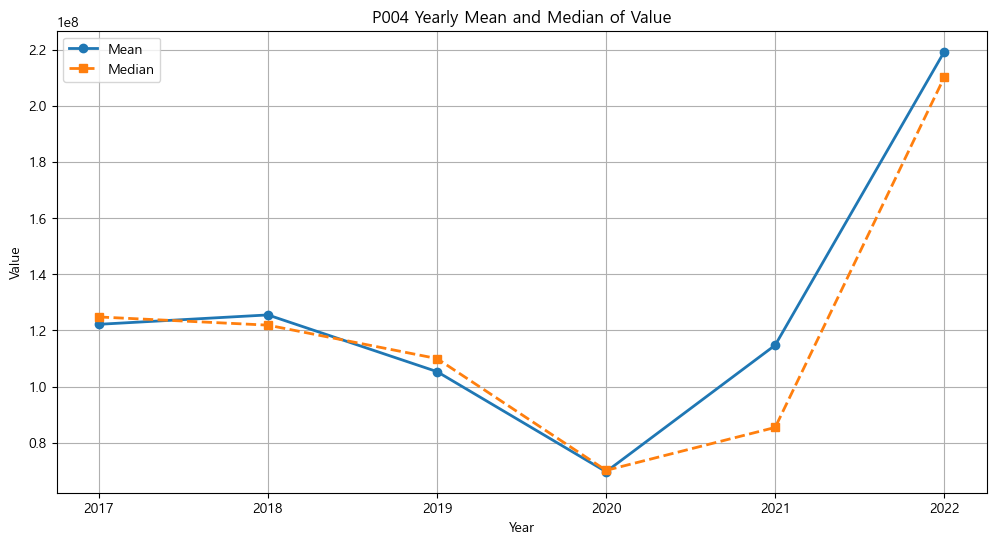

In [11]:
import matplotlib.pyplot as plt

# 연도별 mean과 median 계산
yearly_mean = P004_DF.groupby('year')['value'].mean()
yearly_median = P004_DF.groupby('year')['value'].median()

# 시각화
plt.figure(figsize=(12, 6))

# Mean plot
plt.plot(yearly_mean.index, yearly_mean.values, marker='o', label='Mean', linestyle='-', linewidth=2)

# Median plot
plt.plot(yearly_median.index, yearly_median.values, marker='s', label='Median', linestyle='--', linewidth=2)

# 그래프 제목 및 축 레이블 설정
plt.title('P004 Yearly Mean and Median of Value')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

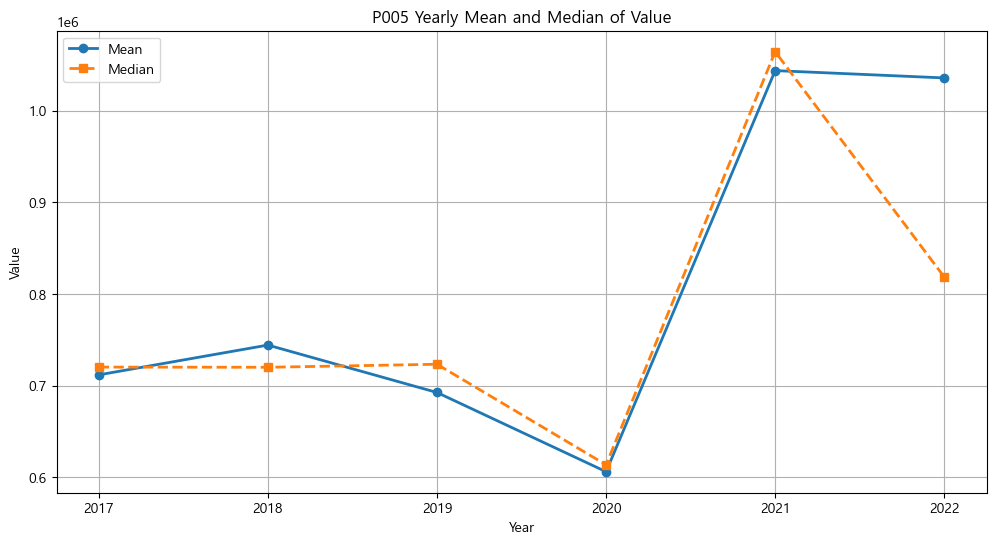

In [12]:
import matplotlib.pyplot as plt

# 연도별 mean과 median 계산
yearly_mean = P005_DF.groupby('year')['value'].mean()
yearly_median = P005_DF.groupby('year')['value'].median()

# 시각화
plt.figure(figsize=(12, 6))

# Mean plot
plt.plot(yearly_mean.index, yearly_mean.values, marker='o', label='Mean', linestyle='-', linewidth=2)

# Median plot
plt.plot(yearly_median.index, yearly_median.values, marker='s', label='Median', linestyle='--', linewidth=2)

# 그래프 제목 및 축 레이블 설정
plt.title('P005 Yearly Mean and Median of Value')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
(P001_DF['value'].mean() + P001_DF['value'].median()) / 2

794946.9212962963

In [22]:
(P001_DF['value'].mean() + P001_DF['value'].median()) / 2

794946.9212962963

In [30]:
(P003_DF['value'].mean() + P003_DF['value'].median()) / 2

2203678.0231481483

# Model

In [84]:
class myModel:
    def predict(df):
        P001_DF = df[df['pid']=='P001']
        P002_DF = df[df['pid']=='P002']
        P003_DF = df[df['pid']=='P003']
        P004_DF = df[df['pid']=='P004']
        P005_DF = df[df['pid']=='P005']
        P001_pred = pd.DataFrame()
        P002_pred = pd.DataFrame()
        P003_pred = pd.DataFrame()
        P004_pred = pd.DataFrame()
        P005_pred = pd.DataFrame()
        Total_pred = pd.DataFrame()

        P001_result = round(((P001_DF['value'].mean() + P001_DF['value'].median()) / 2) * 1.2502155)
        P001_pred['value'] = [P001_result]*36

        ### P002 pred ###
        P002_MEDIAN_2021 = np.median(P002_DF[P002_DF['year']==2021]['value'])
        P002_MEDIAN_2020 = np.median(P002_DF[P002_DF['year']==2020]['value'])
        P002_MEDIAN_2017 = np.median(P002_DF[P002_DF['year']==2017]['value'])
        # 중앙값의 평균값 정의
        P002_MEDIAN_2017_20_21 = (P002_MEDIAN_2021 + P002_MEDIAN_2020 + P002_MEDIAN_2017)/3
        # P002_MEDIAN_2017_20_21 값을 10만 자리에서 반올림
        rounded_to_100k = round(P002_MEDIAN_2017_20_21, -5)
        # 추가 값 계산 (10만 자리 반올림 값 * 1/1000 * 1/3) 을 소수 첫째 자리에서 반올림
        additional_value = round((rounded_to_100k * (1/1000) * (1/3)), 0)
        # 최종 계산
        P002_result = (P002_MEDIAN_2017_20_21 + additional_value) * 1.25
        P002_result = math.floor(P002_result / 10) * 10
        P002_pred['value'] = [P002_result]*36

        ### P003 pred ###
        P003_result = round((P003_DF['value'].mean() + P003_DF['value'].median()) / 2)
        P003_pred['value'] = [P003_result]*36


        ### P004 pred ###
        P004_DF_2022_MM = (P004_DF[P004_DF['year']==2022]['value'].median() + P004_DF[P004_DF['year']==2022]['value'].mean())/2
        P004_DF_2021_MM = (P004_DF[P004_DF['year']==2021]['value'].median() + P004_DF[P004_DF['year']==2021]['value'].mean())/2
        P004_DF_2021_2022_MM = (P004_DF_2022_MM + P004_DF_2021_MM)/2
        P004_DF_2021_2022_MM = round(P004_DF_2021_2022_MM, -7)
        P004_2023_상반기 = P004_DF_2021_2022_MM + 5000000
        P004_2023_하반기 = P004_DF_2021_2022_MM
        P004_pred['value'] = [P004_2023_상반기]*18 + [P004_2023_하반기]*18

        ### P005 pred ###
        P005_result = round(P005_DF['value'].median())
        P005_pred['value'] = [P005_result]*36

        Total_pred = pd.concat([P001_pred, P002_pred, P003_pred, P004_pred, P005_pred], axis=0)
        return Total_pred

In [85]:
Total = myModel.predict(OriginalTrainData)

In [86]:
Total

,value
0,993855.0
1,993855.0
2,993855.0
3,993855.0
4,993855.0
...,...
31,744787.0
32,744787.0
33,744787.0
34,744787.0


In [87]:
sub = pd.read_csv('submission_reference.csv')['seq']

In [88]:
combined_df = pd.concat([sub.reset_index(drop=True), Total.reset_index(drop=True)], axis=1)
combined_df

,seq,value
0,S001,993855.0
1,S002,993855.0
2,S003,993855.0
3,S004,993855.0
4,S005,993855.0
...,...,...
175,S176,744787.0
176,S177,744787.0
177,S178,744787.0
178,S179,744787.0


In [90]:
combined_df.to_csv('submission_sample_a8_re.csv', index=False)